# Discrete Probability Distributions

**OBJECTIVES**
- Model with discrete probability distributions
- Use `scipy.stats` to create discrete distributions
- Use `.pdf, .cdf` methods of distributions

### Widgets

In a terminal please run the following

```
conda install -c conda-forge nodejs
jupyter labextension install @jupyter-widgets/jupyterlab-manager
```

Restart your JupyterLab instance and run the cell below.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from ipywidgets import interact
import ipywidgets as widgets

ModuleNotFoundError: No module named 'seaborn'

### Descriptive Statistics Review

**REVIEW**

Write a function that takes in a list and returns the arithmetic mean of that list. (no `numpy`!)

In [3]:
#function for mean
def arithmetic_mean(x):
    return sum(x)/len(x)

In [4]:
list_1 = [5, 5, 5, 5, 5]
list_2 = [3, 4, 5, 6, 7]
list_3 = [1, 3, 5, 7, 9]

In [5]:
#list comprehension to apply your function
[arithmetic_mean(i) for i in (list_1, list_2, list_3)]

[5.0, 5.0, 5.0]

### Variance

**IN WORDS**: 

<center>
    Find the difference between each data point and the mean, square that value, find the average of these values.
</center>

**IN SYMBOLS**: $$\frac{1}{n}\sum_{i = 1}^{n} (x_i - \mu)^2$$

In [7]:
list_1

[5, 5, 5, 5, 5]

In [8]:
#mean of list 1
l1_mean = 5

In [10]:
#variance of list 1
sum([(xi - l1_mean)**2 for xi in list_1])/len(list_1)

0.0

In [11]:
#function for variance
def variance(x):
    x_mean = arithmetic_mean(x)
    return sum([(xi - x_mean)**2 for xi in x])/len(x)

In [12]:
#find the variance of our lists above
[variance(l) for l in (list_1, list_2, list_3)]

[0.0, 2.0, 8.0]

In [ ]:
#interpret these values


### Standard Deviation

The square root of the variance -- puts things back in terms of the original unit.

In [13]:
#function for square root
def sqrt(x):
    return x**.5

In [14]:
#evaluate on our lists
[sqrt(variance(l)) for l in (list_1, list_2, list_3)]

[0.0, 1.4142135623730951, 2.8284271247461903]

**PROBLEMS**

1. Use the list of player ages below to compute the mean and standard deviation of the data.  
2. Determine the age range within 1.5 standard deviation of the mean. 

In [15]:
player_ages = [21, 21, 22, 23, 24, 24, 25, 25, 28, 29, 29, 31, 32, 33, 33, 34, 35, 36, 36, 36, 36, 38, 38, 38, 40]

In [16]:
np.mean(player_ages), np.std(player_ages)

(30.68, 5.9713984961648645)

In [19]:
# lower, upper
np.mean(player_ages) - 1.5*np.std(player_ages), np.mean(player_ages) + 1.5*np.std(player_ages)

(21.722902255752704, 39.6370977442473)

(array([3., 3., 2., 1., 2., 2., 3., 5., 3., 1.]),
 array([21. , 22.9, 24.8, 26.7, 28.6, 30.5, 32.4, 34.3, 36.2, 38.1, 40. ]),
 <BarContainer object of 10 artists>)

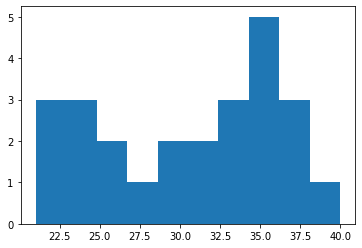

In [20]:
plt.hist(player_ages)

### Probability Mass Functions

$$f(\text{some outcome}) = \text{probability of that outcome}$$

We will care about matching the right probability distribution with a given scenario.  Today we introduce some primary distributions with discrete value inputs.

### Example I: Bernoulli Trial

One event with a binary outcome and a probability of success (and failure).

| outcome | probability |
| --------  | --------  |
|  Heads  | 0.3. |
| Tails |  0.7  |

In [21]:
import scipy.stats as stats

In [22]:
#distribution to model
coin_flip = stats.bernoulli(p = .3)

In [23]:
#probability of failure
coin_flip.pmf(0)

0.7

In [24]:
#probability of success 
coin_flip.pmf(1)

0.3

In [26]:
#variance of the trial
coin_flip.var()

0.21

In [27]:
#standard deviation of the trial
coin_flip.std()

0.458257569495584

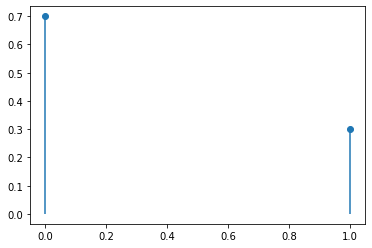

In [29]:
# #plot
x = np.arange(2)
plt.plot(x, coin_flip.pmf(x), 'o')
plt.vlines(0, 0, .7)
plt.vlines(1, 0, .3)

### An Old Game: Sennet

We have some number of popsicle sticks colored blue or red on different sides.  We drop them and explore the possible outcomes.  Imagining each outcome is equally likely, please determine the following:

- Drop 1 stick, $P(R)$
- Drop 1 stick, $P(B)$
- Drop 2 sticks, what are all possible outcomes? $P(\text{one red one blue})$?
- Drop 3 sticks, what are all the possible outcomes? $P(\text{BBB})$?

In [ ]:
# red and red
# blue and blue
# red and blue
# blue and red

In [30]:
#define combinations
#from 3 sticks, how many ways are there
#to land all blue
from scipy.special import comb
#from 3 sticks how many ways are there for 3 "successes"
comb(3, 3)

1.0

In [31]:
#examine outcomes for 3 coins
[comb(3, i) for i in range(4)]

[1.0, 3.0, 3.0, 1.0]

In [ ]:
#determine probabilities for each


In [ ]:
#make a bar plot of probabilities


### Binomial Distribution

Used to model repeated Bernoulli trials.  For example, toss a coin four times.  Its probability mass function is given by:

$$\displaystyle f(k,n,p)=\Pr(k;n,p)=\Pr(X=k)={\binom {n}{k}}p^{k}(1-p)^{n-k}$$



In [32]:
#define binomial
coin_flip = stats.binom(n = 3, p = 0.5)

In [33]:
#probability of 2 heads
coin_flip.pmf(2)

0.3750000000000001

In [34]:
#probability of 3 heads
coin_flip.pmf(3)

0.125

In [35]:
#define range of all possible outcomes
x = np.arange(0, 4)
x

array([0, 1, 2, 3])

<BarContainer object of 4 artists>

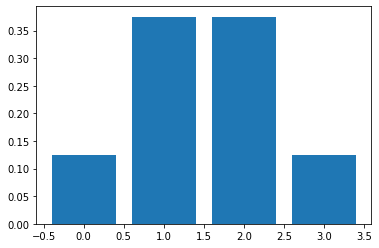

In [36]:
#plot pmf
plt.bar(x, coin_flip.pmf(x))

In [38]:
#probability of no more than 2 heads
###p(0)
p0 = coin_flip.pmf(0)
###p(1)
p1 = coin_flip.pmf(1)
###p(2)
p2 = coin_flip.pmf(2)
p0 + p1 + p2

0.8750000000000002

### Cumulative Distribution Function

Evaluates the cumulative probability up to a given value.  Formally it would be the sum or integral of probabilities until some value $x_i$. 

$$\displaystyle F(k;n,p)=\Pr(X\leq k)=\sum _{i=0}^{\lfloor k\rfloor }{n \choose i}p^{i}(1-p)^{n-i},$$

In [40]:
###Cumulative distribution function
coin_flip.cdf(2)

0.875

Text(0.5, 1.0, 'CDF')

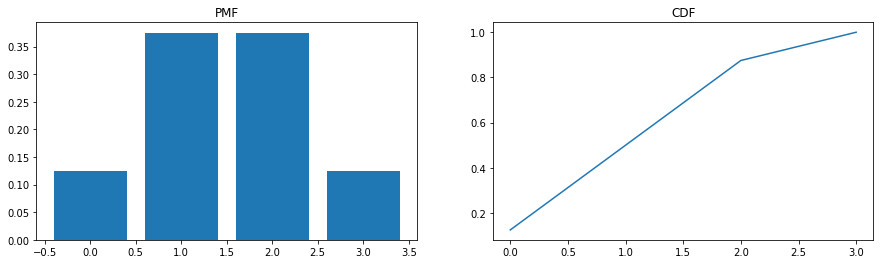

In [41]:
###plot side by side pmf and cdf
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))
x = np.arange(0, 4)
ax[0].bar(x, coin_flip.pmf(x))
ax[0].set_title('PMF')

ax[1].plot(x, coin_flip.cdf(x))
ax[1].set_title('CDF')

**PROBLEMS**

[source](https://openstax.org/books/introductory-statistics/pages/4-3-binomial-distribution)

Here are some good old fashioned math problems.  Use our `scipy` distributions to solve each below.  For extra bonus, add a plot and highlight the area or areas of interest.

1. A trainer is teaching a student to do tricks. The probability that the student successfully performs the trick is 35%, and the probability that the student does not successfully perform the trick is 65%. Out of 20 attempts, you want to find the probability that the student succeeds 12 times.

2. A fair, six-sided die is rolled ten times. Each roll is independent. You want to find the probability of rolling a one more than three times.

3. Approximately 70% of statistics students do their homework in time for it to be collected and graded. Each student does homework independently. In a statistics class of 50 students, what is the probability that at least 40 will do their homework on time?



In [43]:
teacher_dist = stats.binom(n = 20, p = .35)

In [44]:
#p(12)
teacher_dist.pmf(12)

0.013564085376714436

### Problems with Data

Return to the titanic data.  

1. How many men were on the titanic?
2. Plot a binomial distribution with $n = \text{number of men on titanic}$, and probability of $\frac{1}{2}$.  
3. How many men died on the titanic?
4. Locate this outcome on your probability distribution.  Is it unlikely?  Why?